# Convolutions and filters

In this notebook, we will explore one of the most basic tools of image processing. The idea is to extract relevant information from images by applying certain operations to the matrix coding the images. It is also one of the main ingredients of Convolutional Neural Networks.

## Coding

In order to operate the images we need to code them numerically. In our context, this is done by representing each pixel of the picture with three values between 0 and 255, representing the intensity of each basic color (red, green and blue). To make things simpler, we will work with grey scale pictures, so the images will be represented by only one value between 0 and 255, corresponding to the intensity of the color white. Let us start loading a couple of images that we will use throughout this notebook:

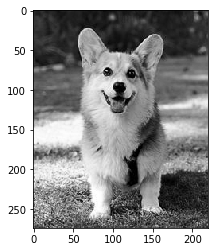

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

corgi = Image.open("../input/corgi-picture/WelshCorgi.jpeg.jpeg")
corgi = corgi.convert('L')
corgi = np.array(corgi)
plt.imshow(corgi, interpolation='nearest',cmap='gray')
plt.show()

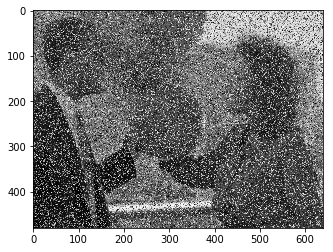

In [2]:
balloons = Image.open("../input/balloons-noisy/balloons_noisy.png")
balloons = balloons.convert('L')
balloons = np.array(balloons)
plt.imshow(balloons, interpolation='nearest',cmap='gray')
plt.show()

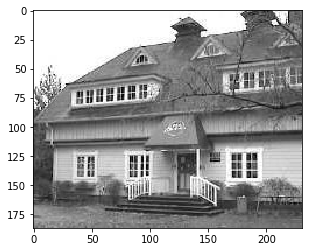

In [3]:
house =Image.open("../input/houses/house.png")
house = house.convert('L')
house = np.array(house)
plt.imshow(house, interpolation='nearest',cmap='gray')
plt.show()

## Convolutions

The ideas of convolutions can be traced back to mathematicians such as D'Alembert, Laplace, Poisson and most notably Fourier. In Terence Tao's words:

> I remember as a graduate student that Ingrid Daubechies frequently referred to convolution by a bump function as "blurring" - its effect on images is similar to what a short-sighted person experiences when taking off his or her glasses (and, indeed, if one works through the geometric optics, convolution is not a bad first approximation for this effect). I found this to be very helpful, not just for understanding convolution per se, but as a lesson that one should try to use physical intuition to model mathematical concepts whenever one can.

In our context, suppose we have an image represented by a matrix $A_{i,j}$. Suppose that we fix a small block of the image, let us say a $3\times 3$ section:
$$ A^{(k,l),3} = \begin{bmatrix}
A_{k-1,l-1} & A_{k-1,l} & A_{k-1,l+1} \\
A_{k,l-1}   & A_{k,l}   & A_{k,l+1}   \\
A_{k+1,l-1} & A_{k+1,l} & A_{k+1,l+1}
\end{bmatrix}$$
Suppose that we want to replace the value of $A_{k,l}$ by some value that represents the local behavior around the pixel represented by $A_{k,l}$. A reasonable option would be to replace $A_{k,l}$ with the average value of all the $9$ pixels around $A_{k,l}$ (including $A_{k,l}$ itself). If we call $A'_{k,l}$ the new value of the pixel represented by $A_{k,l}$, then we have
\begin{align*}
A'_{k,l} = \dfrac{1}{9}\sum_{s,t=-1,0,1} A_{k+s,l+t}.
\end{align*}
We can represent this operation using the Hadamard product $\circ$: let $K_{k,l}$ be the matrix given by
$$ K^{(k,l),3} =\begin{bmatrix}
K_{k-1,l-1} & K_{k-1,l} & K_{k-1,l+1} \\
K_{k,l-1}   & K_{k,l}   & K_{k,l+1}   \\
K_{k+1,l-1} & K_{k+1,l} & K_{k+1,l+1}
\end{bmatrix},$$
then we can represent $A'_{k,l}$ by
$$
A'_{k,l} = \sum_{s,t=0,1,2} (A^{(k,l),3} \circ K^{(k,l),3} )_{s,t}.
$$

For our example, $K_{k,l}=1/9$ for all $k,l$. We will call $K_{k,l}$ the *kernel*, and the operation $A_{k,l}\mapsto A'_{k,l}$ the *local convolution at $A_{k,l}$*  by $K_{k,l}$. If we have a family of kernels $\{K^{(i,j),3}\}_{i,j}$ indexed by the same indices of the matrix $A_{i,j}$, we can perform the process at every entry of the matrix $A_{i,j}$, and the resulting matrix $A'_{i,j}$ is called the *convolution of $A$ by the family of kernels  $\{K^{(i,j),3}\}_{i,j}$*. If the family of kernels is constant equal to a matrix $K$ (as in all of our examples), we call the resulting matrix $A'_{i,j}$ the *convolution of $A$ by the kernel $K$*.

It is important to note that when performing convolutions to the edge elements of the matrix $A_{i,j}$, the block $A^{(k,l),3}$ may not be of size $3\times 3$, in which case we truncate the kernel $K^{(k,l),3}$ to have the same size of the block $A^{(k,l),3}$, with matching indices. This is equivalent to the augmentation of the matrix $A_{i,j}$ with a zeros around its edge. We also remark that these definitions can be generalized to kernels of arbitrary dimensions, in which case the matrix has to be augmentated with more rows and columns of zeros.

A final remark is that after the application of a given kernel, the range of values of the new matrix $A'$ might be different from $[0,255]$, in which case renormalizing is recommended. Otherwise, applying multiple convolutions might lead to overflow.

## Effects of convolutions

We have seen how to define convolutions of images by kernels, and we now address the problem of what is the effect of performing such convolutions. In our first example, we took a kernel given by 
$$ K^{(k,l),3} = \begin{bmatrix}
1/9 & 1/9 & 1/9 \\
1/9 & 1/9 & 1/9 \\
1/9 & 1/9 & 1/9 
\end{bmatrix}  $$
which corresponds to replacing the value $A_{k,l}$ by the average of all the nine values of the neighboring pixels. Suppose that the block $A^{(k,l),3}$ has the form
$$ K^{(k,l),3} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 230 & 0 \\
0 & 0 & 0 
\end{bmatrix}  $$
That is, we have a black background with a very bright pixel in the middle. 

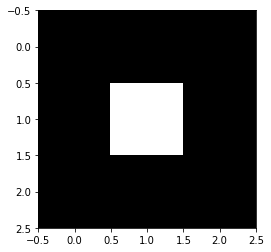

In [4]:
block = np.array([[0,0,0],[0,230,0],[0,0,0]])
plt.imshow(block,cmap='gray')
plt.show()

If we compute the convolution of this block with the kernel above (assuming there is no edge around the block), we obtain the new block
$$ A'^{(k,l),3} = \begin{bmatrix}
26 & 26 & 26 \\
26 & 26 & 26 \\
26 & 26 & 26 
\end{bmatrix}  $$

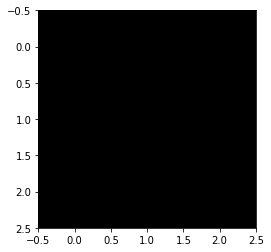

In [5]:
new_block = np.array([[26,26,26],[26,26,26],[26,26,26]])
plt.imshow(new_block,cmap='gray')
plt.show()

We have obtained then a block in which the values of the pixels have been averaged, which resulted in a more uniform block. If we think that the white pixel corresponds to noise in a predominantly black image, then by applying the convolution we have removed some of this noise at the cost of averaging the values of the pixels surrounding the white pixel. We proceed to implement the convolution using `Tensorflow`.

## Convolutions with Tensorflow

We start by importing the `Tensorflow` module:

In [6]:
import tensorflow as tf

Define the averaging kernel by

In [7]:
noise = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

We build now the computational graph. We will use the tensorflow function for 2D convolutions as described above. The input image and the kernel are loaded to placeholders and the output comes from the convolution function from tensorflow. The `strides` option refers that we will apply the convolution with the kernel to every pixel of the image. When we apply the convolution with a kernel $K$, we move the kernel across the matrix to apply it to every single entry of the matrix $A$. We can move the kernel by shifting across the matrix by more than one unit on each axis. The option `strides` controls then by how much we shift the kernel in each dimension. On the other hand, `padding`controls the effects of the convolutions on the borders of the image. We leave it to `SAME` so the convolution performs the effect described above.

In [8]:
input_image = tf.placeholder(tf.float32 , [1,None,None,1])
kernel = tf.placeholder(tf.float32, [None,None,1,1])
output = tf.nn.conv2d(input=input_image, filter=kernel, strides=[1, 1, 1, 1], padding='SAME')

Now we construct a function which takes an image and a kernel and applies the convolution using that kernel. The function returns an image of the same shape as the input.

In [9]:
def conv(img,ker):
    with tf.Session() as sess:
        convoluted_image = sess.run(output, feed_dict={input_image: img.reshape(1,img.shape[0],img.shape[1],1), 
                                kernel: ker.reshape(ker.shape[0],ker.shape[1],1,1)})
    return convoluted_image[0,:,:,0]

We can apply now the convolution to the picture `balloons`, which has a high level of noise:

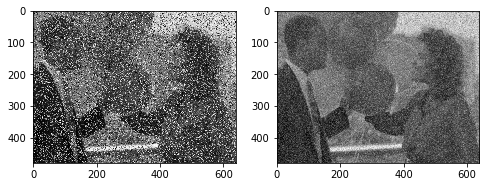

In [10]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(balloons, interpolation='nearest',cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(conv(balloons,noise),cmap='gray')

We can iterate the process to obtained a more 

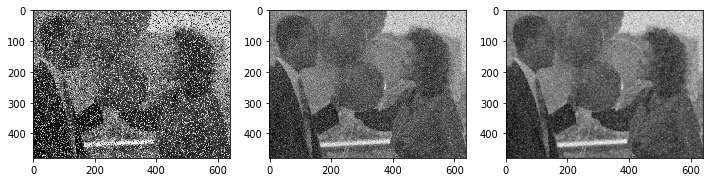

In [11]:
fig=plt.figure(figsize=(12, 8))
fig.add_subplot(1,3,1)
plt.imshow(balloons, interpolation='nearest',cmap='gray')
fig.add_subplot(1,3,2)
plt.imshow(conv(balloons,noise),cmap='gray')
fig.add_subplot(1,3,3)
plt.imshow(conv(conv(balloons,noise),noise),cmap='gray')

## Different kernels

We have seen the noise reducting effect of the averaging kernel. What other effects can we achieve if we use a different kernel? In this section we will explore the posibilities.

### Edge kernel

The edge kernel can be defined in several ways. We will start with the x-axis edges detection kernel. As it name says, its purpose is to detect edges along the x axis. We can define it by

$$ K_{\text{edge,x}} = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 2
\end{bmatrix} . $$

The action of this kernel can be understood as follows. Consider the image shown below:

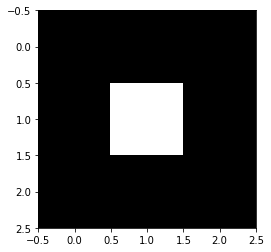

In [12]:
edge_img = np.array([[0,0,0,255,255,255,255],[0,0,0,255,255,255,255],[0,0,0,255,255,255,255],
                  [0,0,0,255,255,255,255],[0,0,0,255,255,255,255],[0,0,0,255,255,255,255],[0,0,0,255,255,255,255],])
plt.imshow(block,cmap='gray')
plt.show()

Now let us analize the effect of the kernel on this image. Fix a black pixel which is not next to the black/white edge. That is, a pixel $A_{k,l}$ with neighboring pixels represented by the block

$$ A^{(k,l),3} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0 
\end{bmatrix}  $$

If we apply the kernel $K_{\text{edge},x}$ to that pixel, we obtain $A'_{k,l}=-4*0 + 4*0 = 0$. On the other hand, if we apply it to a pixel $A_{k',l'}$ with neighboring pixels represented by the block

$$ A^{(k,l),3} = \begin{bmatrix}
255 & 255 & 255 \\
255 & 255 & 255 \\
255 &255 & 255
\end{bmatrix}  $$

(that is, a white pixel surrounded by white pixels), we obtain again the value $A'_{k',l'}=-4*255+4*255=0$. On the other hand, if we apply the kernel to a pixel right next to the black/white edge, that is, a pixel with neighboring pixels represented by the block

$$ A^{(k'',l''),3} = \begin{bmatrix}
0 & 0 & 255 \\
0 & 0 & 255 \\
0 &0 & 255
\end{bmatrix} , $$

then we obtain $A'_{k'',l''}=-4*0 + 4*255 = 1020$. We can see that the kernel is effectively detecting differences of the values of $A_{i,j}$ along the x axis. When there is no difference, the result of the convolution will be approximately $0$, while when we see big differences in neighboring pixels, the result of the convolution will be a number of high absolute value. We will now apply the convolution to the image above. We start by defining the kernel to be applied:

In [13]:
edge_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

Now we proceed to apply the kernel:

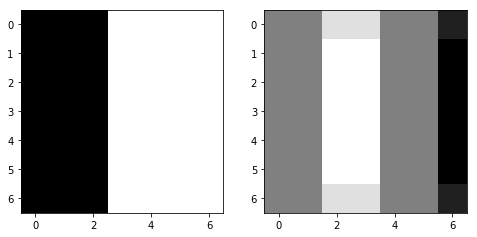

In [14]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(edge_img, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(conv(edge_img,edge_x),cmap='gray')

It is worth noting that some noise is produced around the edges as a result of padding. This effect is less evident if the image is of larger size:

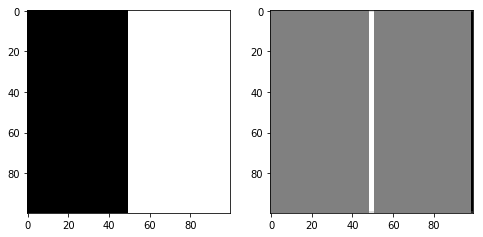

In [15]:
edge_img2 = np.hstack([np.zeros([100,50]),255*np.ones([100,50])])
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(edge_img2, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(conv(edge_img2,edge_x),cmap='gray')

The idea of the edge detecting kernel can be applied to detect edges along the y axis as well. In this case, the kernel is given by

$$ K_{\text{edge,y}} = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix} . $$

The effects of both kernels can be combined into a single kernel given by

$$ K_{\text{edge}} = \begin{bmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1
\end{bmatrix} . $$

Let us apply this kernel to some of the images we loaded and see its effect on them:

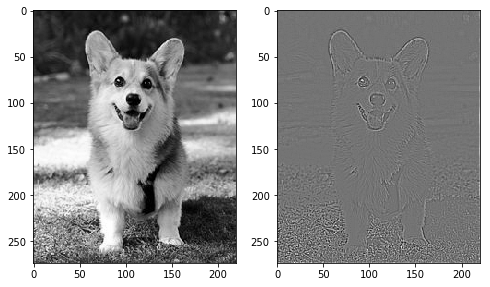

In [16]:
edge = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(corgi, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(conv(corgi,edge),cmap='gray')

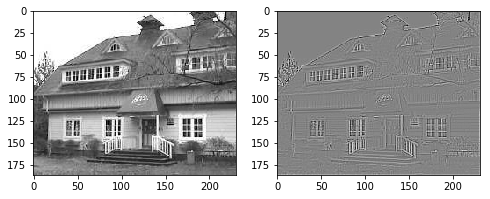

In [17]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(house, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(conv(house,edge),cmap='gray')

Finally, we list some other kernels which are often used:

In [18]:
sharp = (1/16)*np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
sobel_x = sobel_y.T
laplacian_gaussian = np.array([[0,0,-1,0,0,],[0,-1,-2,-1,0],[-1,-2,16,-2,-1],[0,-1,-2,-1,0],[0,0,-1,0,0]])
unsharp_masking = (-1/256)*np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,-476,24,6],[4,16,24,16,4],[1,4,6,4,1]])

Let us see their effect when applied to some of the images:

### X axis Sobel kernel:

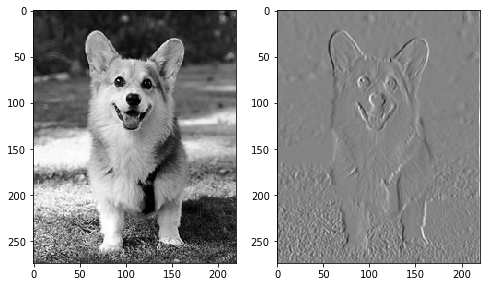

In [19]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(corgi, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(conv(corgi,sobel_x),cmap='gray')

### Laplacian-Gaussian kernel:

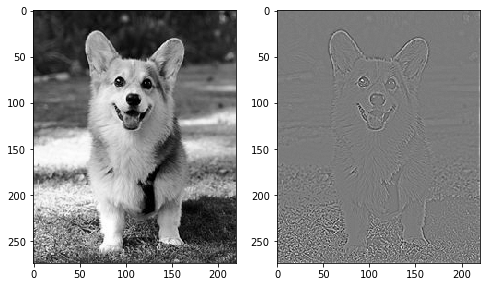

In [20]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(corgi, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(conv(corgi,laplacian_gaussian),cmap='gray')

### Unsharp masking kernel:

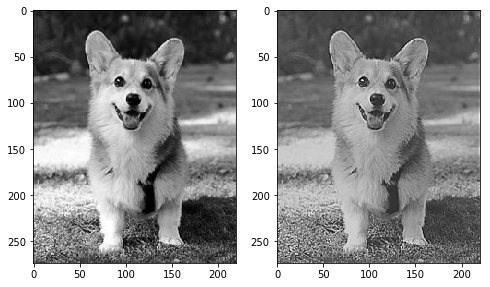

In [21]:
fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(corgi, cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(conv(corgi,unsharp_masking),cmap='gray')

## Final remarks

We finish remarking that there are other operations to modify the value of a given pixel which are not determined by matrix kernels. We will explore these ideas in future notebooks, as well as the idea of pooling.